# Задача 1. Обнаружение фальшивых новостей

Фальшивые новости — это ложная информация, распространяемая через социальные сети и другие сетевые СМИ для достижения политических или идеологических целей.

Твоя  задача -  используя библиотеку __sklearn__ построить модель классического машинного обучения, которая может с высокой точностью более 90% определять, является ли новость реальной (REAL) или фальшивой (FAKE).

Ты должен самостоятельно изучить и применить к задаче __TfidfVectorizer__ для извлечения признаков из текстовых данных и __PassiveAggressiveClassifier.__

Ты  можешь использовать данный [датасет](https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv) для обучения.

Построй матрицу ошибок (confusion matrix). Представь, что ваш заказчик очень любит графики и диаграммы. Визуализируй для него результаты там, где это возможно.



## Введение

### Что такое TfidfVectorizer?

Изучение текстовых данных является одной из фундаментальных задач в области анализа данных и машинного обучения.

Однако тексты представляют собой сложные и многомерные структуры, которые не могут быть напрямую обработаны алгоритмами машинного обучения. В этом контексте извлечение признаков — это процесс преобразования текстовых данных в числовые векторы, которые могут быть использованы для обучения моделей и анализа. Этот шаг играет ключевую роль в предварительной обработке данных перед применением алгоритмов.

**Term Frequency-Inverse Document Frequency** (TF-IDF) — это один из наиболее распространенных и мощных методов для извлечения признаков из текстовых данных. TF-IDF вычисляет важность каждого слова в документе относительно количества его употреблений в данном документе и во всей коллекции текстов. Этот метод позволяет выделить ключевые слова и понять, какие слова имеют больший вес для определенного документа в контексте всей коллекции.

**TfidfVectorizer** преобразует коллекцию необработанных документов в матрицу объектов TF-IDF.

### Что такое пассивно-агрессивный классификатор (PassiveAggressiveClassifier)?

**Пассивно-агрессивный классификатор** – это алгоритм онлайн-обучения, в котором вы обучаете систему постепенно, загружая ее экземпляры последовательно, отдельно или небольшими группами, называемыми мини-партиями.

При онлайн-обучении модель машинного обучения обучается и развертывается в производственной среде таким образом, чтобы обучение продолжалось по мере поступления новых наборов данных. Таким образом, мы можем сказать, что такой алгоритм, как пассивно-агрессивный классификатор, лучше всего подходит для систем, которые получают данные в непрерывном потоке. Он пассивно реагирует на правильные классификации и агрессивно реагирует на любые просчеты.

##№ О наборе данных:
* Этот набор данных имеет форму 6335×4.

* Первый столбец идентифицирует новость.

* Второй и третий - заголовок и текст.

* Четвертый столбец содержит метки, обозначающие, является ли новость РЕАЛЬНОЙ или ФАЛЬШИВОЙ. 

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## 1. Обработка датасета


### Загрузка набора данных

In [2]:
url = 'https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv'
df_news = pd.read_csv(url)


### Исследование набора данных

In [3]:
df_news.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df_news.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


### Проверка на наличие нулевых или отсутствующих значений

In [5]:
df_news.isnull().sum()


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### Поиск дубликатов

In [ ]:
df_news.duplicated().sum()


0

### Построение графика набора данных

<Axes: xlabel='label', ylabel='count'>

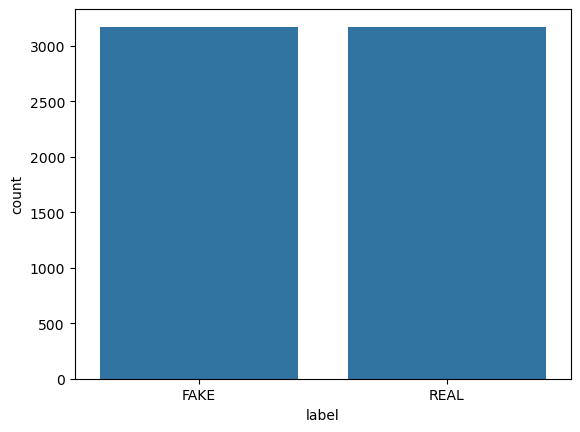

In [7]:
# Распределение реальных и фальшивых новостей
sns.countplot(x=df_news.label)


## 2. Построение модели

### Разделение данных на обучающие и тестовые

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df_news['text'], df_news.label, test_size=0.2, random_state=7)


In [9]:
print(f'Размеры обучающего набора: \n X: {X_train.shape} y: {y_train.shape}')
print(f'Размеры тестового набора: \n X: {X_test.shape} y: {y_test.shape}')


Размеры обучающего набора: 
 X: (5068,) y: (5068,)
Размеры тестового набора: 
 X: (1267,) y: (1267,)


### Инициализация TfidVectorizer 

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)


### Подгонка и преобразование обучающих и тестовых данных

In [11]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


### Инциализация пассивно-агрессивного классификатора

In [12]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

### Прогнозирование на основе тестовых данных

In [13]:
y_pred = pac.predict(tfidf_test)


## 3. Анализ модели

### Определение точности 

In [14]:
score = accuracy_score(y_test, y_pred)
print(f'Точность: {round(score*100, 2)}%')


Точность: 92.82%


### Создание матрицы ошибок

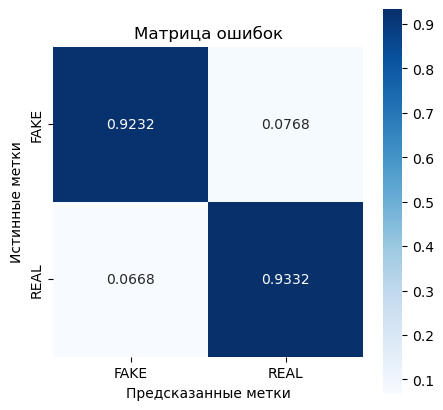

In [15]:
labels = ['FAKE', 'REAL']


def show_confusion_matrix(y_test, y_pred):
    # Вычисление матрицы ошибок и ее нормализация
    plt.figure(figsize=(5, 5))
    confusion = confusion_matrix(y_test, y_pred, normalize='true')
    ax = sns.heatmap(
        confusion, xticklabels=labels, yticklabels=labels,
        cmap='Blues', annot=True, fmt='.4f', square=True)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')


show_confusion_matrix(y_test, y_pred)


# Задача 2. Обнаружение болезни паркинсона с помощью XGBoost

Твоя задача с помощью Data Science предсказать заболевание паркинсона на ранней стадии, используя алгоритм машинного обучения **XGBoost** и библиотеку **sklearn** для нормализации признаков. Как это сделать? Тебя  придется самостоятельно изучить данный вопрос.

Используй следующий датасет [UCI ML Parkinsons](https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data). Описание признаков и меток датасета представлены [здесь](https://storage.yandexcloud.net/academy.ai/practica/parkinsons.names). От тебя  требуется помимо создания самой модели получить ее точность на тестовой выборке. Выборки делить в соотношении 80% обучающая, 20% - тестовая.
Дополнительные баллы ты получишь, если сможешь получить точность более 95%.

## Введение.

Что такое болезнь Паркинсона?

Болезнь Паркинсона - прогрессирующее заболевание центральной нервной системы, влияющее на движение и вызывающее тремор и скованность движений.

У нее 5 стадий, и ежегодно ею страдают более 1 миллиона человек только в одной Индии. Это хроническое заболевание, и его пока не лечат. Это нейродегенеративное расстройство, поражающее нейроны головного мозга, вырабатывающие дофамин.

Что такое XGBoost?

**XGBoost** - это новый алгоритм машинного обучения, разработанный с учетом скорости и производительности.

**XGBoost** расшифровывается как экстремальное повышение градиента и основан на деревьях решений.

Многие считают его одним из лучших алгоритмов и из-за его высокой производительности при решении задач регрессии и классификации, рекомендуют его в качестве первого выбора во многих ситуациях. XGBoost прославился тем, что выиграл множество соревнований Kaggle

Есть 2 распространенных способа использования XGBoost:

* Learning API: это базовый низкоуровневый способ использования XGBoost. Простой и мощный, он включает встроенный метод перекрестной проверки.
* Scikit-Learn API: это интерфейс-оболочка Scikit-Learn для XGBoost. Он позволяет использовать XGBoost совместимым с scikit-learn способом, точно так же, как вы использовали бы любую нативную модель scikit-learn.

В этом задании мы рекомендуем использовать XGBClassifier из библиотеки xgboost, который является реализацией scikit-learn API для классификации XGBoost.

### Информация о наборе данных:

Этот набор данных состоит из ряда биомедицинских измерений голоса, полученных от 31 человека, 23 из которых страдают болезнью Паркинсон (БП). Каждый столбец в таблице представляет собой конкретный показатель голоса, а каждая строка соответствует одной из 195 голосовых записей этих людей (столбец «имя»). 
Основная цель данных состоит в том, чтобы отличить здоровых людей от людей с БП в соответствии со столбцом «статус», который имеет значение 0 для здоровых и 1 для больных БП.

Информация об атрибутах:

Записи в столбцах матрицы (атрибуты):
* name - ASCII имя субъекта и номер записи
* MDVP:Fo(Hz) - средняя основная частота вокала
* MDVP:Fhi(Hz) - Максимальная основная частота вокала
* MDVP:Flo(Hz) - Минимальная основная частота вокала
* MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - несколько показателей изменения основной частоты
* MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA - несколько показателей вариации амплитуды
* NHR, HNR - две меры соотношения шумовых и тональных компонентов в голосе 
* status - состояние здоровья испытуемого (один) - болезнь Паркинсона, (ноль) - здоров
* RPDE, D2 - две меры нелинейной динамической сложности
* DFA - экспонента фрактального масштабирования сигнала
* spread1, spread2, PPE - три нелинейные меры вариации основной частоты 


## Импорт необходимых библиотек

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


## 1. Обработка датасета


### Загрузка набора данных

In [17]:
url = 'https://storage.yandexcloud.net/academy.ai/practica/parkinsons.data'
df_park = pd.read_csv(url)


### Исследование набора данных

In [18]:
display(df_park)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [19]:
df_park.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Все столбцы в файле числовые, за исключением первого столбца name. Столбец с метками состоит из нулей (отсутствие болезни) и единиц (наличие), соответственно это столбец status:

### Проверка на наличие нулевых или отсутствующих значений

In [31]:
df_park.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Поиск дубликатов

In [32]:
df_park.duplicated().sum()


0

### Построение графика набора данных

<Axes: xlabel='status', ylabel='count'>

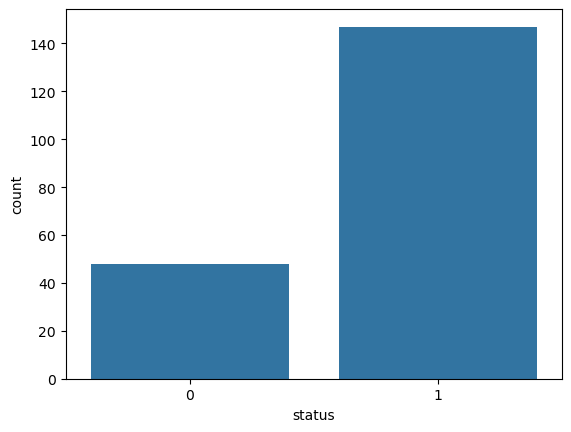

In [20]:
# Посмотрим распределение статуса болезни в наборе данных
y = df_park.status
sns.countplot(x=y)


### Скейлинг данных

<Axes: >

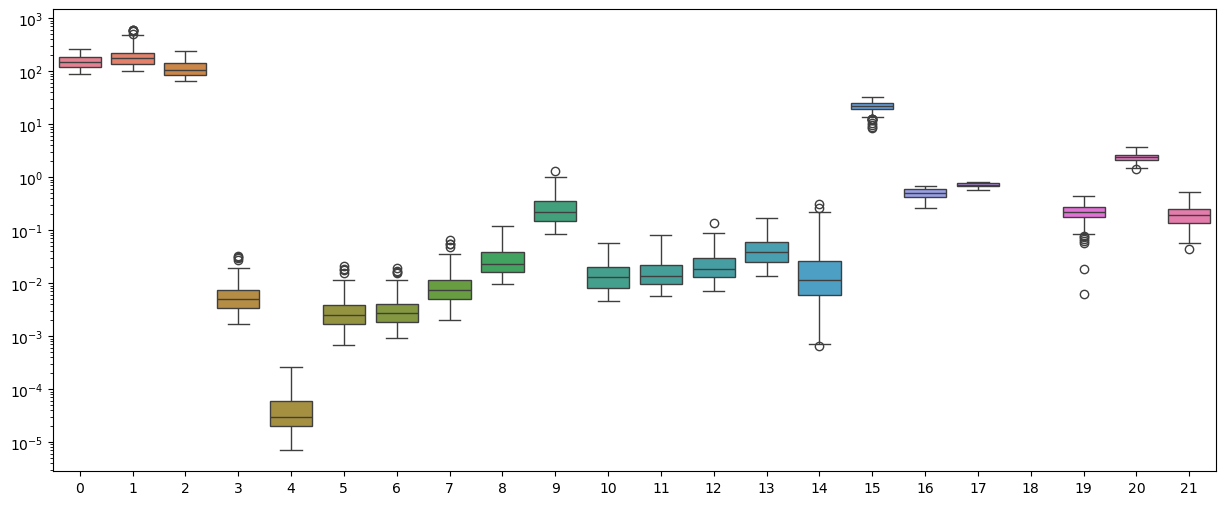

In [ ]:
# Выделим все признаки в отдельную переменную
all_features = df_park.loc[:, df_park.columns != 'status'].values[:, 1:]

# Посмотрим на распределение признаков
plt.figure(figsize=(15, 6))
sns.boxplot(all_features, log_scale=True)


Далее необходимо нормировать признаки так, чтобы конечные значения находились в интервале от -1 до 1. Для этого применим MinMaxScaler из библиотеки sklearn:

In [23]:
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(all_features)


<Axes: >

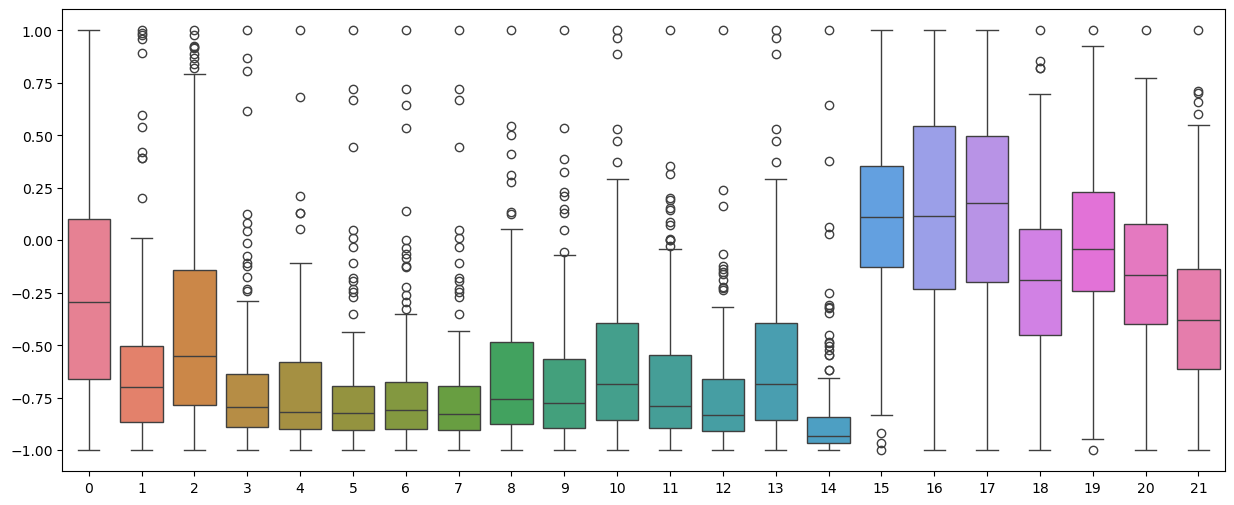

In [24]:
# Посмотрим на нормированные признаки
plt.figure(figsize=(15, 6))
sns.boxplot(X)


## 2. Построение модели

### Разделение данных на обучающие и тестовые

In [35]:
# Разделим выборку в соотношении 80% обучающая, 20% - тестовая.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


### Инциализация алгоритма XGBoost

In [36]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)


### Прогнозирование на основе тестовых данных

In [37]:
y_pred = xgb_clf.predict(X_test)


## 3. Анализ модели

### Определение точности 

In [ ]:
# Оценка точности с использованием метода score
print('Точность классификатора XGBoost на обучающих данных : {:.2f}%'.format(
    xgb_clf.score(X_train, y_train)*100))
print('Точность классификатора XGBoost на тестовых данных : {:.2f}%'.format(
    xgb_clf.score(X_test, y_test)*100))


Точность классификатора XGBoost на обучающих данных : 100.00%
Точность классификатора XGBoost на тестовых данных : 92.31%


### Создание матрицы ошибок

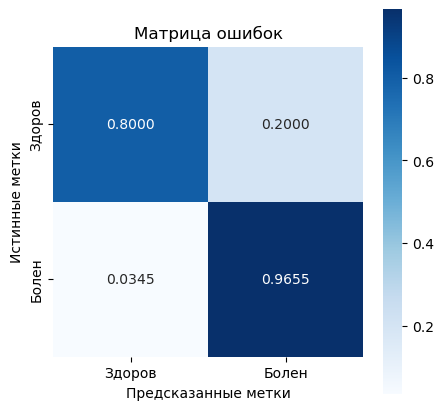

In [ ]:
def show_confusion_matrix(y_test, y_pred):
    # Вычисление матрицы ошибок и ее нормализация
    labels = ['Здоров', 'Болен']
    plt.figure(figsize=(5, 5))
    confusion = confusion_matrix(y_test, y_pred, normalize='true')
    ax = sns.heatmap(
        confusion, xticklabels=labels, yticklabels=labels,
        cmap='Blues', annot=True, fmt='.4f', square=True)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинные метки')
    plt.xlabel('Предсказанные метки')


show_confusion_matrix(y_test, y_pred)


# Задача 3. Творческая

Во многих крупных ИТ-компаниях существует практика, что сотрудник 80% времени тратит на проекты компании, а 20% на проекты, которые, как он считает могут принести прибыль компании в будущем. Умение вести такие "личные" проекты - очень высоко ценится.

Твоя  задача, поставить такую задачу перед собой и ее решить, используя следующие вводные:

* Это должна быть задача классического машинного обучения.

* Ты должен продемонстрировать умение визуализировать данные.

* Твое решение должно быть полным, работоспособным, с развернутым описанием, так чтобы ее было не стыдно разместить в вашем резюме и GitHub.

* Это должно быть твое решение. Твоя задача не должна быть заимствована с GitHub, Kaggle, Хабра и т.д.

* Использовать можно любой публичный датасет.

* Если ты знаете, где хочешь работать, то попробуй спрогнозировать, какая задача будет в будущем интересна для этой компании.

* Если у тебя имеется своя личная задача, которую ты хочешь решить в рамках курса или с которой ты пришел на курс, можешь взять ее. Если твоя задача будет сложная, амбициозная, то можешь ее делать дольше предложенного срока в 2 недели, при поддержке кураторов.

## Введение

Motorcycle Price Prediction

![Bike](https://cdn.bajajauto.com/-/media/assets/bajajauto/bikes/bikelisting/pulsar/pulsarns125.png)

About Dataset

This dataset contains information about used motorcycles

This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

* name
* selling price
* year
* seller type
* owner
* km driven
* ex showroom price

[Ссылка на датасет](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset/)

## Импорт необходимых библиотек

In [42]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
from lazypredict.Supervised import LazyRegressor

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval


## 1. Обработка датасета


In [91]:
# import dataset
bike_dataset = pd.read_csv("BIKE DETAILS.csv")


In [92]:
# check first 5 rows
bike_dataset.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.00
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.00
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [93]:
# check the information
bike_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


### Очистка данных

In [94]:
# check null values
bike_dataset.isnull().sum()


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [95]:
# drop all null values
bike_dataset.dropna(inplace=True)


In [96]:
# check duplicate rows
bike_dataset.duplicated().sum()


4

In [97]:

# drop duplicate rows
bike_dataset.drop_duplicates(inplace=True)
# recheck shape
bike_dataset.shape


(622, 7)

### Кодирование категориальных признаков

In [98]:
# check distribution of categorical data
print(bike_dataset.owner.value_counts())
print(bike_dataset.seller_type.value_counts())


owner
1st owner    552
2nd owner     66
3rd owner      3
4th owner      1
Name: count, dtype: int64
seller_type
Individual    619
Dealer          3
Name: count, dtype: int64


In [ ]:
with pd.option_context("future.no_silent_downcasting", True):
    # encoding "Owner" Column
    bike_dataset.replace({'owner': {'1st owner': 0, '2nd owner': 1,
                                    '3rd owner': 2, '4th owner': 3}},
                         inplace=True)

    # encoding "Seller_Type" Column
    bike_dataset.replace({'seller_type': {'Dealer': 0, 'Individual': 1}},
                         inplace=True)


In [100]:
# sort the data by price
bike_dataset = bike_dataset.sort_values('selling_price', ignore_index=True)


### Построение графика набора данных

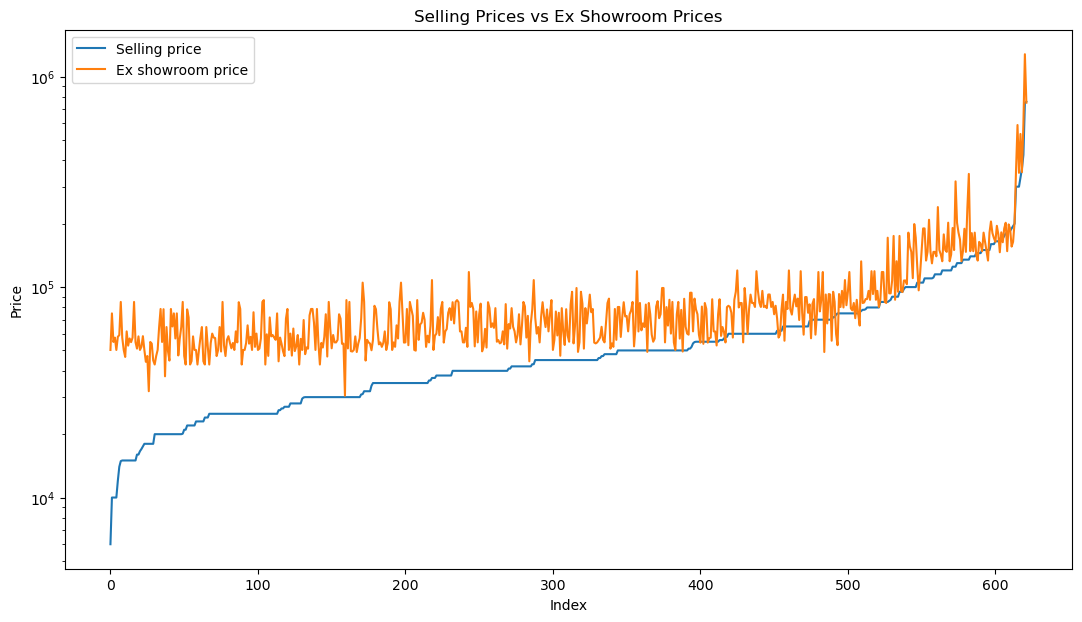

In [ ]:
# plot price and ex_showroom_price
x = range(bike_dataset.shape[0])
plt.figure(figsize=(13, 7))
plt.plot(x, 'selling_price', data=bike_dataset, label="Selling price")
plt.plot(x, 'ex_showroom_price', data=bike_dataset, label="Ex showroom price")
plt.yscale('log')
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Selling Prices vs Ex Showroom Prices")
plt.legend()
plt.show()


Как мы видим на графике цена продажи не очень сильно зависит от цены в салоне, а иногда б/у мотоцикл даже стоит дороже нового

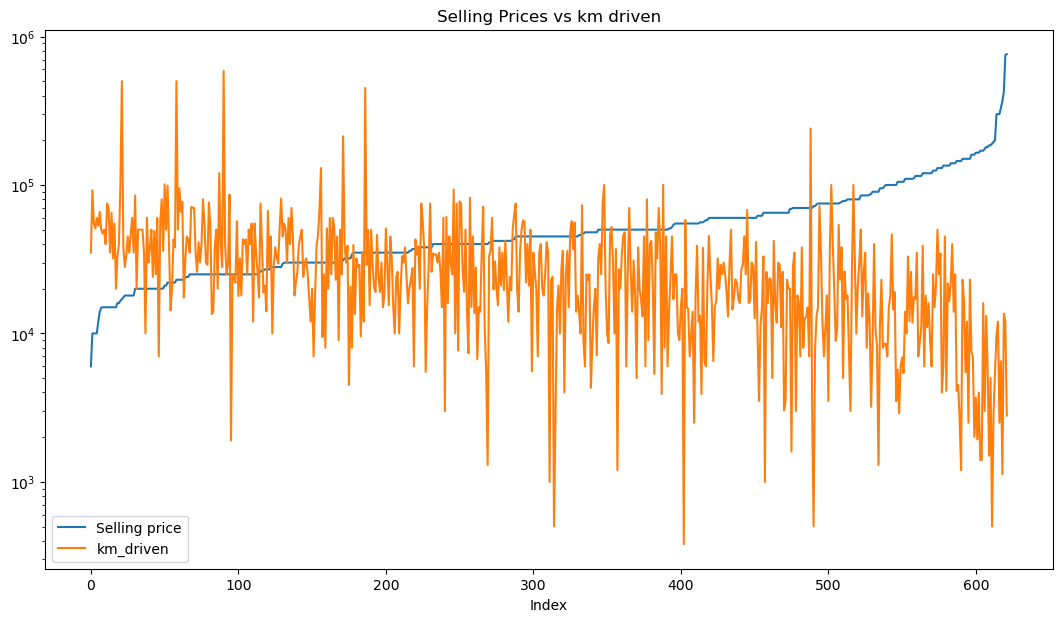

In [ ]:
# plot price and km_driven
x = range(bike_dataset.shape[0])
plt.figure(figsize=(13, 7))
plt.plot(x, 'selling_price', data=bike_dataset, label="Selling price")
plt.plot(x, 'km_driven', data=bike_dataset, label="km_driven")
plt.yscale('log')
plt.xlabel("Index")
plt.title("Selling Prices vs km driven")
plt.legend()
plt.show()


Как мы видим на графике между ценой продажи и пробегом так же нет четкой зависимости.

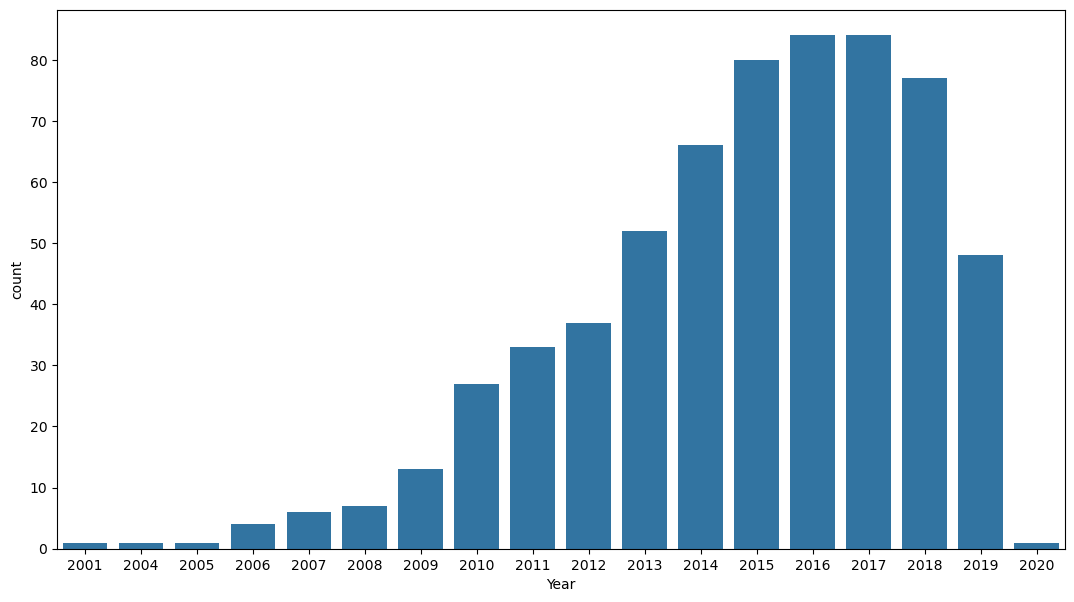

In [ ]:
# plot price data
plt.figure(figsize=(13, 7))
sns.countplot(bike_dataset, x='year')
plt.xlabel("Year")
plt.show()


Распределение по годам совсем не равномерное.

Из анализа данных мы можем сделать вывод, что распределение признаков очень не равномерное и каких то четких зависимостей между целевым параметром (цена продажи) и другими показателями не обнаружено.

## 2. Определяем подходящий алгоритм с помощью Lazy Regressor

### Разделение данных на обучающие и тестовые

In [56]:
# split data into X and Y
X = bike_dataset.drop(['name', 'selling_price'], axis=1)
Y = bike_dataset['selling_price']


In [105]:
# split the sample in the ratio of 80% training, 20% testing.
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=24)


### Поиск наилучшего алгоритма

In [58]:
# compare various classifier models
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
estimators, predictions = reg.fit(X_train, X_test, y_train, y_test)

# view
display(estimators.head())


100%|██████████| 42/42 [00:01<00:00, 27.43it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 497, number of used features: 4
[LightGBM] [Info] Start training from score 59952.058350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.89,0.90,14288.32,0.08
KNeighborsRegressor,0.84,0.85,17394.45,0.01
ElasticNet,0.82,0.83,18373.27,0.00
LassoLarsCV,0.81,0.82,18842.06,0.01
LarsCV,0.81,0.82,18842.06,0.01


Лучше всего нам подходит XGBRegressor

## 3. Построение модели

### Инциализация алгоритма XGBoost

In [59]:

xgbr = XGBRegressor(eval_metric="rmse", random_state=42, n_jobs=4)
xgbr.fit(X_train, y_train, verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=4,
             num_parallel_tree=None, random_state=42, ...)

### Прогнозирование на основе тренировочных данных

In [118]:
# Predict on train data
xgbr_pred_train = xgbr.predict(X_train)

# Calculate evaluation metrics
mape = np.round(mean_absolute_percentage_error(
    y_train, xgbr_pred_train)*100, 2)
mae = mean_absolute_error(y_train, xgbr_pred_train)
mse = mean_squared_error(y_train, xgbr_pred_train)
rmse = np.sqrt(mse)
r_squared = np.round(r2_score(y_train, xgbr_pred_train)*100, 2)

# Print the evaluation metrics
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r_squared, '%')


Mean Absolute Percentage Error (MAPE): 2.49 %
Mean Absolute Error (MAE): 1028.6193980287978
Mean Squared Error (MSE): 2458399.613852313
Root Mean Squared Error (RMSE): 1567.9284466621277
R-squared (R²): 99.94 %


In [ ]:
def plot_metrics(train_metric, val_metric, sec_metric, metric_type):
    # Визуализация цен
    plt.figure()
    plt.plot(range(len(train_metric)), train_metric,
             label=f"Selling {metric_type}")
    plt.plot(range(len(val_metric)), val_metric,
             label=f"Predicted {metric_type}")
    plt.plot(range(len(sec_metric)), sec_metric,
             label=f"Showroom {metric_type}")
    plt.xlabel("index")
    plt.ylabel(metric_type)
    plt.yscale('log')
    plt.legend()
    plt.title(f"Selling, Predict and Ex showroom {metric_type}")


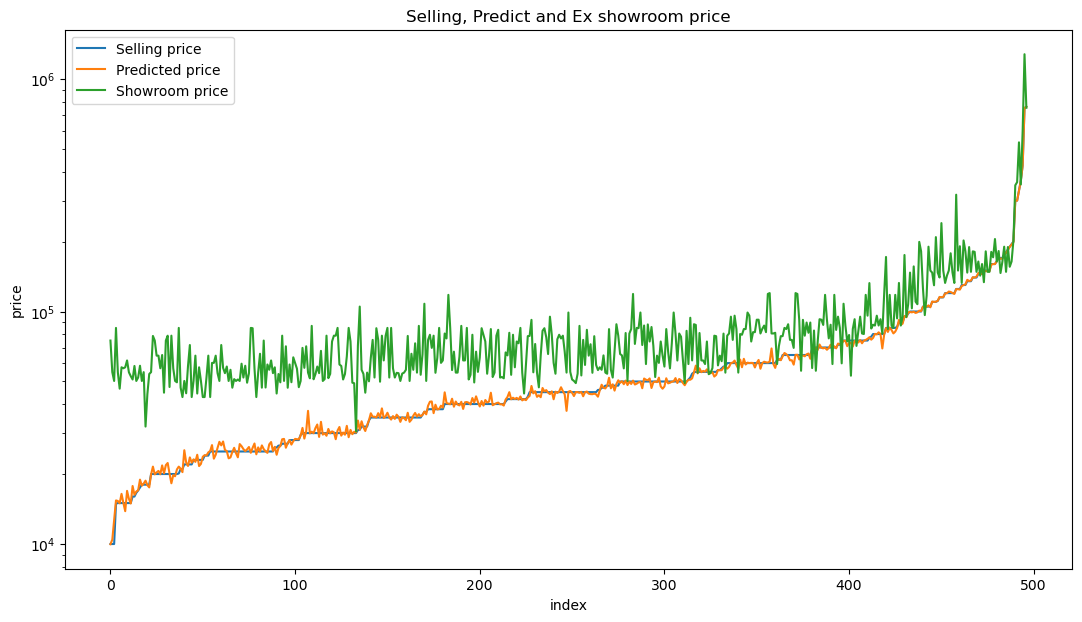

In [110]:
# Let's see how well the model guesses the price
df_train = pd.concat([X_train, y_train], axis=1).reset_index()
df_train = pd.concat([df_train,
                     pd.Series(xgbr_pred_train, name='predicted_price')],
                     axis=1)
df_train = df_train.drop(
    df_train.columns[:5], axis=1).sort_values('selling_price')

plot_metrics(df_train['selling_price'],
             df_train['predicted_price'],
             df_train['ex_showroom_price'],
             "price")


### Прогнозирование на основе тестовых данных

In [156]:
# Predict on test data
xgbr_pred_test = xgbr.predict(X_test)

# Calculate evaluation metrics
mape = np.round(mean_absolute_percentage_error(
    y_test, xgbr_pred_test)*100, 2)
mae = mean_absolute_error(y_test, xgbr_pred_test)
mse = mean_squared_error(y_test, xgbr_pred_test)
rmse = np.sqrt(mse)
r_squared = np.round(r2_score(y_test, xgbr_pred_test)*100, 2)

# Save metrics fo conclusion
metrics_test = [mape, mae, rmse, r_squared]

# Print the evaluation metrics
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r_squared, '%')


Mean Absolute Percentage Error (MAPE): 24.23 %
Mean Absolute Error (MAE): 10348.6518203125
Mean Squared Error (MSE): 204156021.1407086
Root Mean Squared Error (RMSE): 14288.317645570054
R-squared (R²): 89.6 %


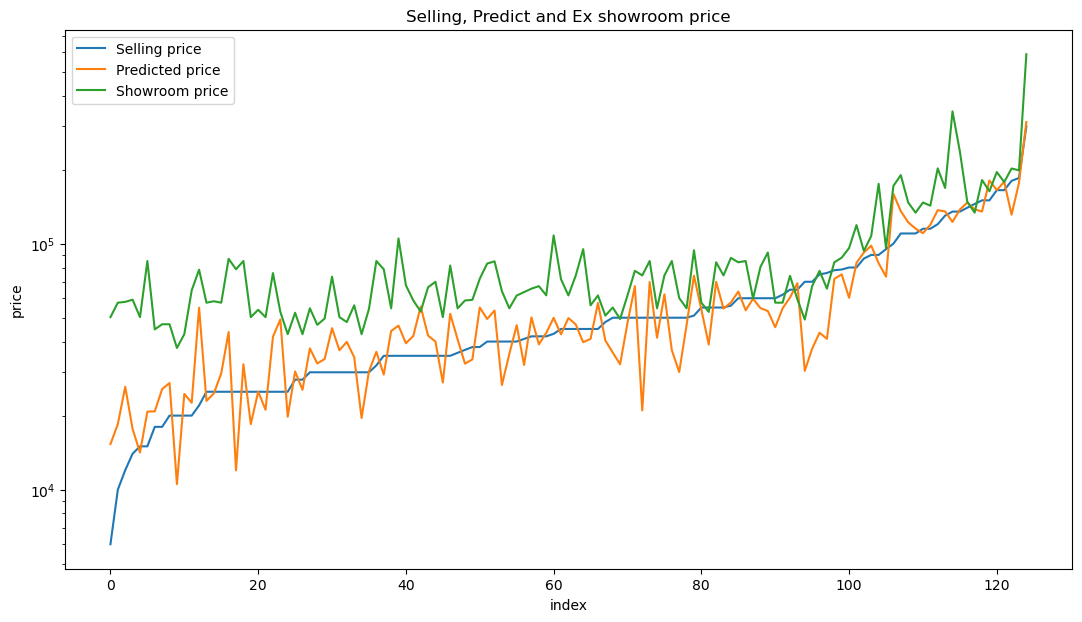

In [108]:
# Let's see how well the model guesses the price

df_test = pd.concat([X_test, y_test], axis=1).reset_index()
df_test = pd.concat([df_test,
                     pd.Series(xgbr_pred_test, name='predicted_price')],
                    axis=1)
df_test = df_test.drop(
    df_test.columns[:5], axis=1).sort_values('selling_price')

plot_metrics(df_test['selling_price'],
             df_test['predicted_price'],
             df_test['ex_showroom_price'],
             "price")


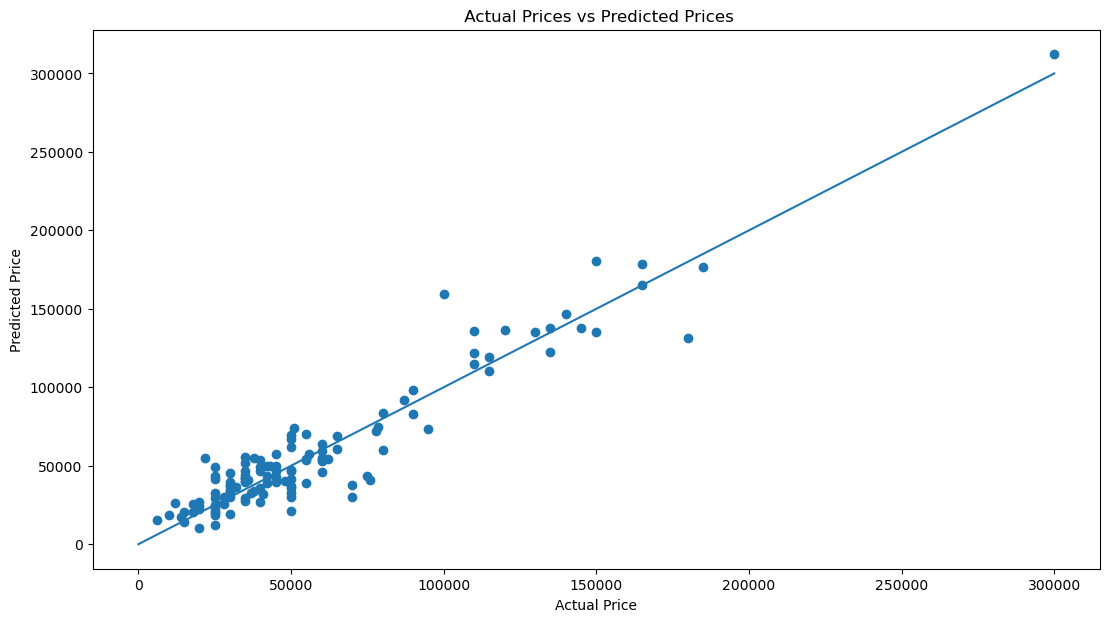

In [64]:
# plot the actual vs predicted model
plt.scatter(x=y_test, y=xgbr_pred_test)
plt.plot(range(int(y_test.max())))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


### Вывод

Средняя абсолютная процентная ошибка модели - 24%

Cреднеквадратическая ошибка - 14290

Коэффициент детерминации - 89.6%

Наша модель объясняет около 90% вариации зависимой переменной и при этом в среднем ошибается на 25%. 

Не очень хорошие показатели, попробуем подобрать гиперпараметры модели, чтобы увеличить ее точность.

## 4. Настройка гиперпараметров с помощью Hyperopt


In [124]:
# Initialize domain space for range of values

space = {'learning_rate': hp.uniform('learning_rate', 0.1, 0.2),
         'gamma': hp.uniform('gamma', 0, 3),
         'max_depth': hp.choice('max_depth', np.arange(1, 17, dtype=int)),
         'min_child_weight': hp.quniform('min_child_weight', 0, 2, 1),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 0.8),
         'reg_lambda': hp.uniform('reg_lambda', 70, 90),
         'reg_alpha': hp.uniform('reg_alpha', 10, 40),
         'n_estimators': hp.choice('n_estimators', np.arange(500, 700, 10, dtype=int))
         }


In [144]:
# Define objective function

def objective(space):
    xgbr = XGBRegressor(**space,
                        early_stopping_rounds=10,
                        random_state=42
                        )

    evaluation = [(X_train, y_train), (X_test, y_test)]

    xgbr.fit(X_train, y_train,
             eval_set=evaluation,
             verbose=False)

    pred = xgbr.predict(X_test)
    accuracy = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(f'R-squared (R²): {np.round(accuracy*100, 2)} %')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    return {'loss': rmse, 'params': space, 'status': STATUS_OK}


In [ ]:
# Optimization algorithm

trials = Trials()

best_hyperparams = fmin(fn=objective,
                        space=space,
                        algo=tpe.suggest,
                        max_evals=100,
                        trials=trials
                        )


R-squared (R²): 92.14 %                                
Root Mean Squared Error (RMSE): 12421.640643958277     
R-squared (R²): 93.36 %                                                          
Root Mean Squared Error (RMSE): 11420.720652196118                               
R-squared (R²): 93.42 %                                                          
Root Mean Squared Error (RMSE): 11367.134456409387                               
R-squared (R²): 92.86 %                                                          
Root Mean Squared Error (RMSE): 11840.251166329614                               
R-squared (R²): 93.25 %                                                          
Root Mean Squared Error (RMSE): 11510.256001614625                               
R-squared (R²): 93.29 %                                                          
Root Mean Squared Error (RMSE): 11475.367436409728                               
R-squared (R²): 93.0 %                                              

### Посмотрим как наши параметры влияют на точность модели

<Axes: xlabel='n_estimators', ylabel='loss'>

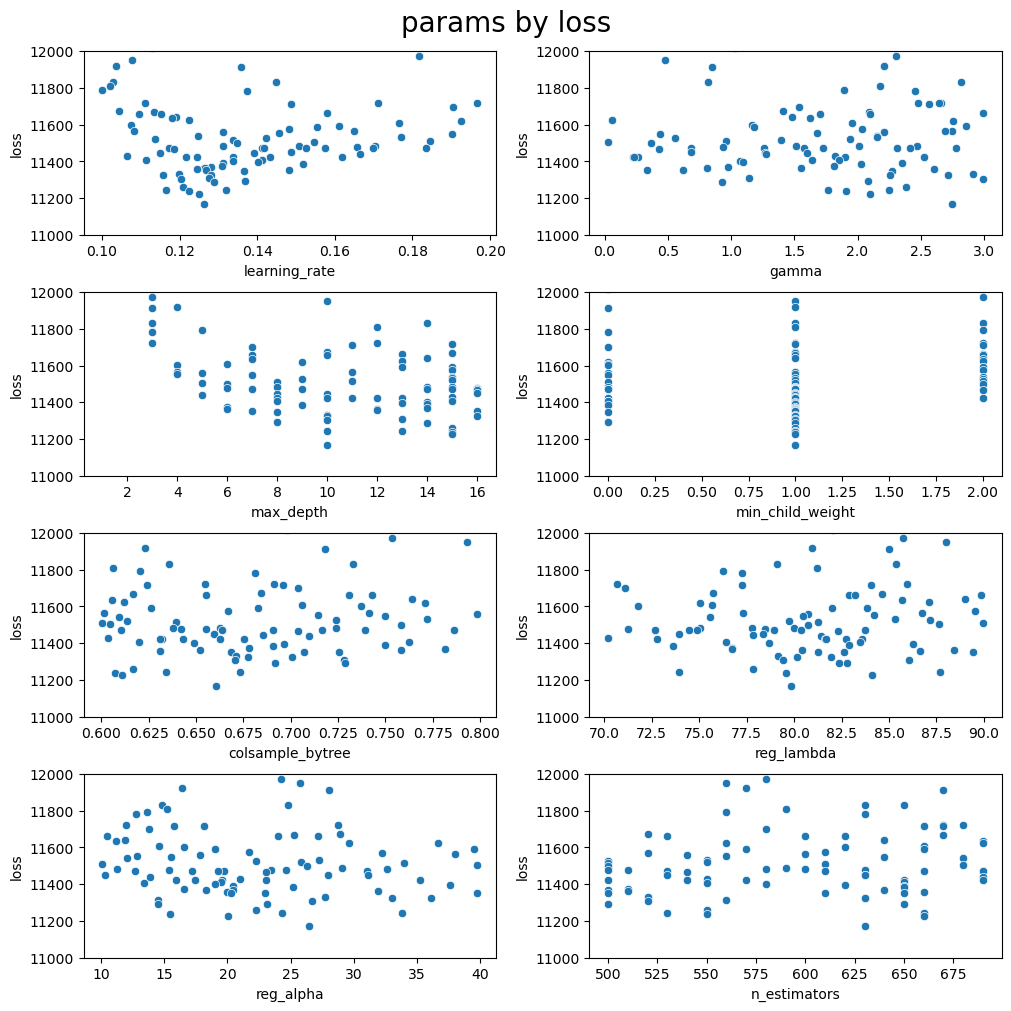

In [69]:
# Display the dependence of RMSE on our parameters

def df_results(hp_results):
    """
    Отображаем результаты hyperopt в формате DataFrame 

    :hp_results: результаты hyperop
    :return: pandas DataFrame
    """

    results = pd.DataFrame([{**x, **x['params']} for x in hp_results])
    results.drop(labels=['status', 'params'], axis=1, inplace=True)
    results.sort_values(by=['loss'], ascending=False, inplace=True)
    return results


results = df_results(trials.results)

fig, axs = plt.subplots(4, 2, figsize=(10, 10), layout="constrained")

for ax in axs.flat:
    ax.set_ylim(11000, 12000)

fig.suptitle('params by loss', size=20)

sns.scatterplot(ax=axs[0, 0], data=results, y='loss', x='learning_rate')
sns.scatterplot(ax=axs[0, 1], data=results, y='loss', x='gamma')
sns.scatterplot(ax=axs[1, 0], data=results, y='loss', x='max_depth')
sns.scatterplot(ax=axs[1, 1], data=results, y='loss', x='min_child_weight')
sns.scatterplot(ax=axs[2, 0], data=results, y='loss', x='colsample_bytree')
sns.scatterplot(ax=axs[2, 1], data=results, y='loss', x='reg_lambda')
sns.scatterplot(ax=axs[3, 0], data=results, y='loss', x='reg_alpha')
sns.scatterplot(ax=axs[3, 1], data=results, y='loss', x='n_estimators')


Как мы видим на графиках распределение параметров довольно хаотичное, четких зависимостей не прослеживается, по этому настраивать их еще дальше не будем.

### Печать получившихся гиперпараметров

In [154]:
best = space_eval(space, best_hyperparams)
display('The best hyperparameters are:', best)
print("Best Result (RMSE): {}".format(trials.average_best_error()))


'The best hyperparameters are:'

{'colsample_bytree': 0.6972204870811385,
 'gamma': 1.5393372665689142,
 'learning_rate': 0.11597634903494247,
 'max_depth': 8,
 'min_child_weight': 0.0,
 'n_estimators': 540,
 'reg_alpha': 19.727869806069666,
 'reg_lambda': 70.36577451251162}

Best Result (RMSE): 11165.471930071411


### Инциализация алгоритма XGBoost с новыми гиперпараметрами

In [ ]:
xgbr_1 = XGBRegressor(eval_metric="rmse",
                      random_state=42,
                      early_stopping_rounds=10
                      )

xgbr_1.set_params(**best)

evaluation = [(X_train, y_train), (X_test, y_test)]

xgbr_1.fit(X_train, y_train,
           eval_set=evaluation,
           verbose=False
           )


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6972204870811385, device=None,
             early_stopping_rounds=10, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=1.5393372665689142,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11597634903494247,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=0.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=540, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## 5. Анализ модели

### Посмотрим как влияют признаки на прогнозирование модели

Этот код выведет график с баллами важности каждого признака. Чем выше балл, тем более важна характеристика для модели.

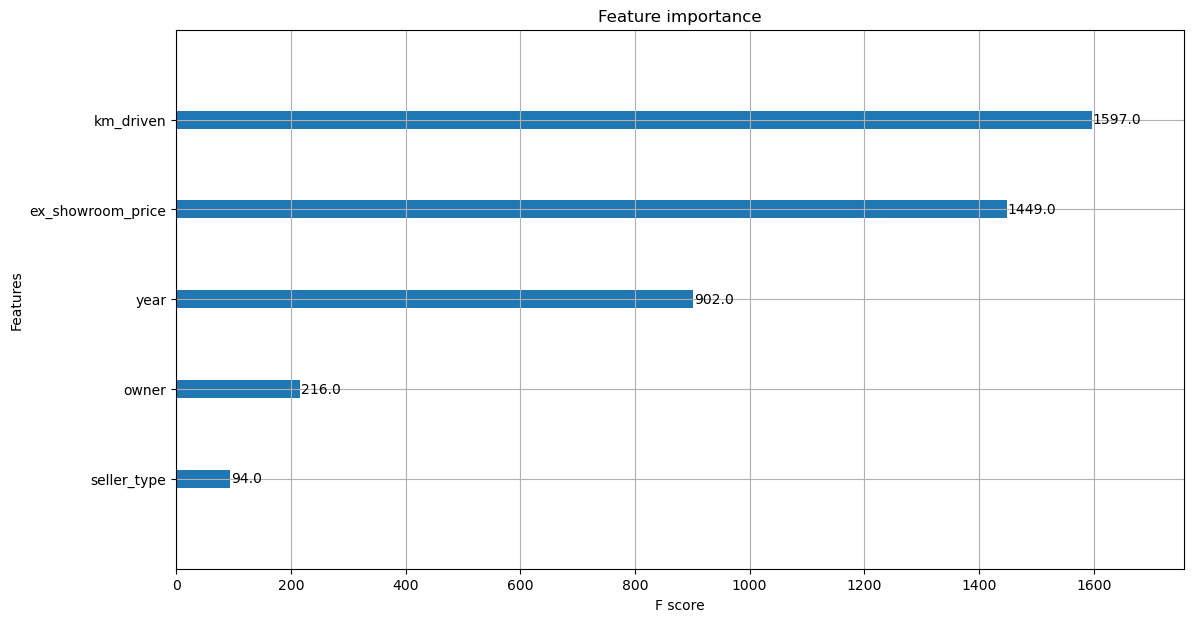

In [151]:
# Show important features
plot_importance(xgbr_1)
plt.show()


### Прогнозирование новой модели на основе тренировочных данных

In [148]:
# Predict on train data
xgbr_1_pred_train = xgbr_1.predict(X_train)

# Calculate evaluation metrics
mape = np.round(mean_absolute_percentage_error(
    y_train, xgbr_1_pred_train)*100, 2)
mae = mean_absolute_error(y_train, xgbr_1_pred_train)
mse = mean_squared_error(y_train, xgbr_1_pred_train)
rmse = np.sqrt(mse)
r_squared = np.round(r2_score(y_train, xgbr_1_pred_train)*100, 2)

# Print the evaluation metrics
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r_squared, '%')


Mean Absolute Percentage Error (MAPE): 14.07 %
Mean Absolute Error (MAE): 8078.398160447057
Mean Squared Error (MSE): 760731116.2638859
Root Mean Squared Error (RMSE): 27581.3545037927
R-squared (R²): 81.04 %


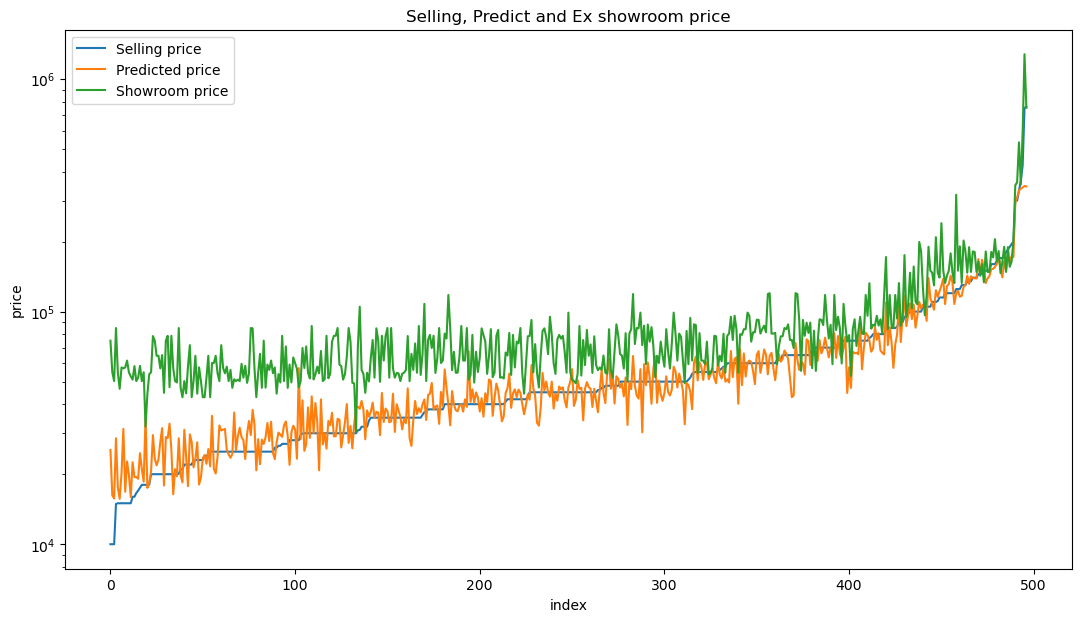

In [173]:
# Let's see how well the model guesses the price

df_train = pd.concat([X_train, y_train], axis=1).reset_index()
df_train = pd.concat([df_train,
                     pd.Series(xgbr_1_pred_train, name='predicted_price')],
                     axis=1)
df_train = df_train.drop(
    df_train.columns[:5], axis=1).sort_values('selling_price')

plot_metrics(df_train['selling_price'],
             df_train['predicted_price'],
             df_train['ex_showroom_price'],
             "price")


### Прогнозирование новой модели на основе тестовых данных

In [ ]:
# Predict on test data
xgbr_1_pred_test = xgbr_1.predict(X_test)

# Calculate evaluation metrics
mape = np.round(mean_absolute_percentage_error(
    y_test, xgbr_1_pred_test)*100, 2)
mae = mean_absolute_error(y_test, xgbr_1_pred_test)
mse = mean_squared_error(y_test, xgbr_1_pred_test)
rmse = np.sqrt(mse)
r_squared = np.round(r2_score(y_test, xgbr_1_pred_test)*100, 2)

# Save metrics fo conclusion
metrics_test_1 = [mape, mae, rmse, r_squared]

# Print the evaluation metrics
print('Mean Absolute Percentage Error (MAPE):', mape, '%')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r_squared, '%')


Mean Absolute Percentage Error (MAPE): 20.97 %
Mean Absolute Error (MAE): 8397.5808671875
Mean Squared Error (MSE): 124667763.42121261
Root Mean Squared Error (RMSE): 11165.471930071411
R-squared (R²): 93.65 %


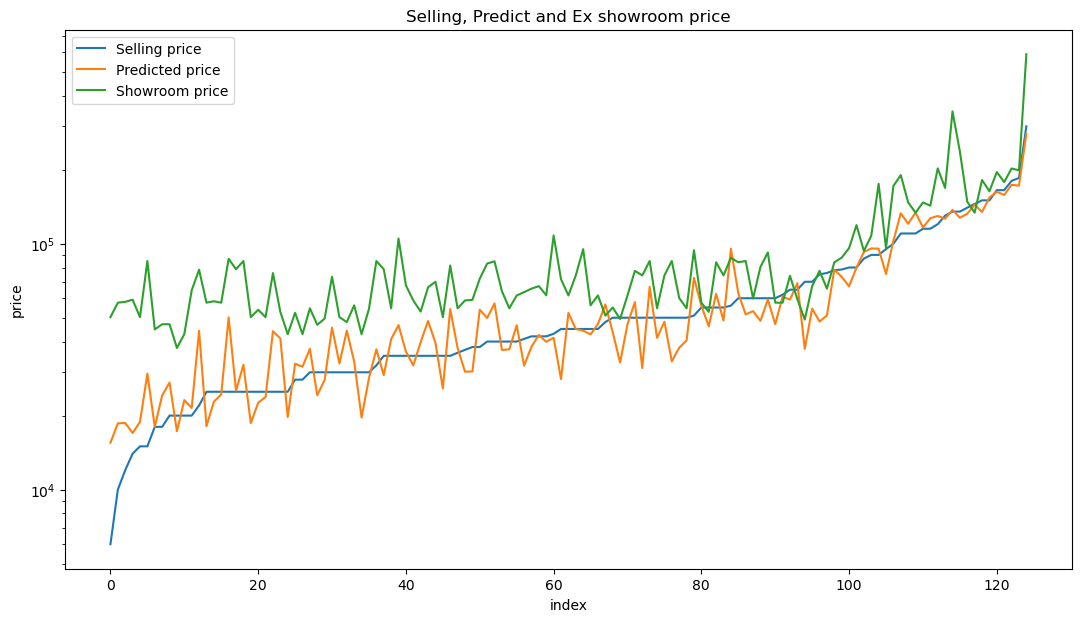

In [ ]:
# Let's see how well the model guesses the price

df_test = pd.concat([X_test, y_test], axis=1).reset_index()
df_test = pd.concat([df_test,
                     pd.Series(xgbr_1_pred_test, name='predicted_price')],
                    axis=1)
df_test = df_test.drop(
    df_test.columns[:5], axis=1).sort_values('selling_price')

plot_metrics(df_test['selling_price'],
             df_test['predicted_price'],
             df_test['ex_showroom_price'],
             "price")


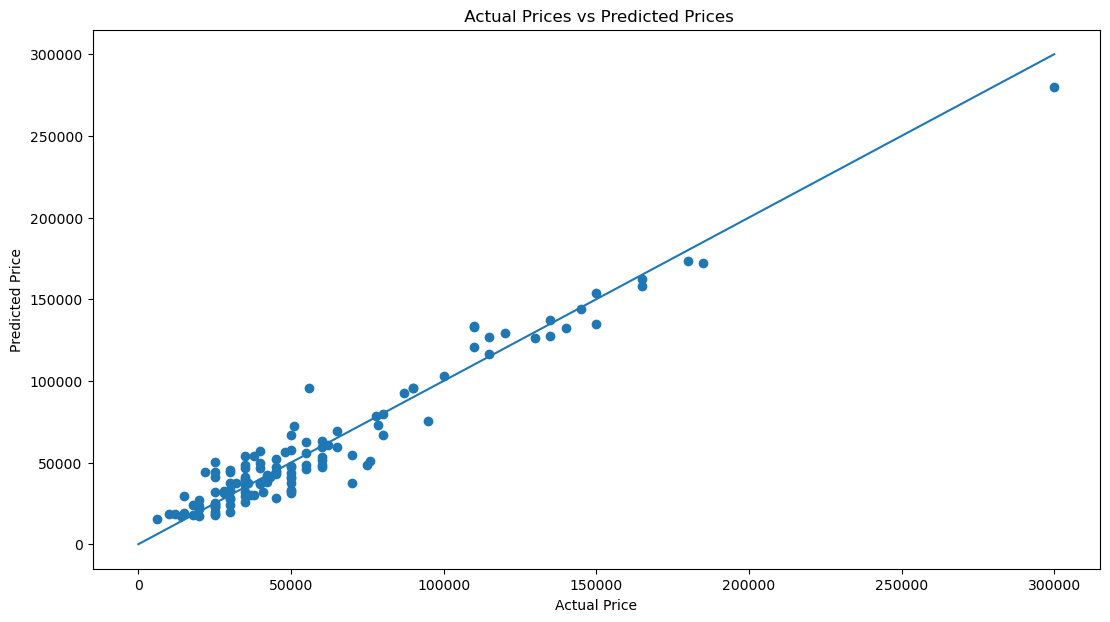

In [155]:
# plot the actual vs predicted model
plt.scatter(x=y_test, y=xgbr_1_pred_test)
plt.plot(range(int(y_test.max())))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


## Вывод

In [ ]:
# create a dataframe with the metrics of our two models
df_metrics = pd.DataFrame(list(zip(metrics_test, metrics_test_1)),
                          columns=['Original Metrics', 'Hyperopt Metrics'],
                          index=['mape', 'mae', 'rmse', 'r_2'])
df_metrics['Difference'] = df_metrics['Hyperopt Metrics'] - \
    df_metrics['Original Metrics']

print(df_metrics)


      Original Metrics  Hyperopt Metrics  Difference
mape             24.23             20.97       -3.26
mae           10348.65           8397.58    -1951.07
rmse          14288.32          11165.47    -3122.85
r_2              89.60             93.65        4.05


Как мы видим настройка гиперпараметров помогла улучшить прогнозирование модели, хотя и не так сильно как хотелось бы. Возможно это по тому что сами данные довольно хаотичны и плохо поддаются прогнозированию.

## Вывод по заданию

В этом задании мы загрузили и обработали датасет, визуализировали и проанализировали распределение и зависимости в данных, выбрали подходящий алгоритм для моделирования с помощью Lazy Regressor, построили модель машинного обучения с помощью XGBoost, оптимизировали гиперпараметры модели с помощью Hyperopt.